![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resources

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [3]:
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Read `Salaries.csv` as a dataframe called `sal`.**

In [4]:
link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
sal = pd.read_csv(link)
print("check 1")

check 1


**Check the head of the DataFrame.**

In [7]:
sal.head(5)
# sal[['EmployeeName','JobTitle']].head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [8]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [ ]:
sal.BasePay.mean()

66325.44884050643

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [ ]:
# Your Code Here
sal.BasePay.min()

-166.01

In [ ]:
# Your Code Here
sal.BasePay.max()

319275.01

**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [ ]:
# Your Code Here
sal.OvertimePay.mean()

5066.059886444622

In [ ]:
# Your Code Here
sal.OvertimePay.min()

-0.01

In [ ]:
# Your Code Here
sal.OvertimePay.max()
# print('Shape:', sal.shape)
sal.shape

(148654, 13)

**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [ ]:
# Your Code Here
# JOSEPH = sal[sal['EmployeeName'] == "JOSEPH DRISCOLL"]
# JOSEPH[:5].JobTitle
JOSEPH = sal[sal['EmployeeName'].str.upper() == "JOSEPH DRISCOLL"]
JOSEPH[:5].JobTitle



24       CAPTAIN, FIRE SUPPRESSION
36198    Captain, Fire Suppression
Name: JobTitle, dtype: object

In [ ]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your Code Here
JOSEPH = sal[sal['EmployeeName'].str.upper() == "GARY JIMENEZ"]
JOSEPH

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [58]:
# Your Code Here
JOSEPH = sal[sal['EmployeeName'].str.upper() == "JOSEPH DRISCOLL"]
make = JOSEPH[['EmployeeName','JobTitle','TotalPayBenefits']]
make

,EmployeeName,JobTitle,TotalPayBenefits
24,JOSEPH DRISCOLL,"CAPTAIN, FIRE SUPPRESSION",270324.91
36198,Joseph Driscoll,"Captain, Fire Suppression",331834.79


**What is the name of highest paid person (including benefits)?**

> Indented block



In [54]:
# Your Code Here
highest = sal.TotalPayBenefits.max()
name = sal[sal['TotalPayBenefits'] == highest]
name['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [53]:
# Your Code Here
lowest  = sal.TotalPayBenefits.min()
name = sal[sal['TotalPayBenefits'] == lowest]
name['EmployeeName']

148653    Joe Lopez
Name: EmployeeName, dtype: object

### His benefits were negative

**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [52]:
# Your Code Here
average = sal.groupby("Year").mean()
average['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [18]:
# Your Code Here
len(sal['JobTitle'].unique())

2159

**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [49]:
# Your Code Here
most = sal['JobTitle'].value_counts(sort=True).nlargest(5)
most


Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [32]:
# Your Code Here
job2013 = sal[sal['Year'] == 2013]
job2013['JobTitle'].unique().tolist()
# sal['JobTitle'].value_counts(sort=True).nlargest(5)

['Chief of Police',
 'Chief, Fire Department',
 'Battalion Chief, Fire Suppress',
 'Asst Med Examiner',
 'Dep Dir for Investments, Ret',
 'Asst Chf of Dept (Fire Dept)',
 'Executive Contract Employee',
 'Dept Head V',
 'Gen Mgr, Public Trnsp Dept',
 'Senior Physician Specialist',
 'Deputy Chief 3',
 'Dep Chf of Dept (Fire Dept)',
 'Lieutenant, Fire Suppression',
 'Mayor',
 'Assistant Deputy Chief 2',
 'Adm, SFGH Medical Center',
 'Captain, Fire Suppression',
 'Controller',
 'Deputy Sheriff',
 'Anesthetist',
 'EMT/Paramedic/Firefighter',
 'Inspector 3',
 'Port Director',
 'Emergency Medical Svcs Chief',
 'Dep Dir V',
 'Lieutenant 3',
 'Deputy Dir II, MTA',
 'Commander 3',
 'Incident Support Specialist',
 'Nursing Supervisor',
 'District Attorney',
 'Captain, Emergency Med Svcs',
 'Firefighter',
 'Manager VIII',
 'City Attorney',
 'Dept Head IV',
 'Lieut,Fire Prev',
 'Police Officer 2',
 'Police Officer',
 'Sheriff (SFERS)',
 'Administrator, DPH',
 'Nurse Manager',
 'Sergeant 3',
 'Capta

**How many people have the word Chief in their job title?**

> Indented block



In [43]:
# Your Code Here
Chief = sal[sal['JobTitle'].str.contains('Chief', regex=False, case=False, na=False)]
# Chief.shape
len(Chief.index)


627

## Data Visualization

**Implement seaborn's countplot with x='Year'**

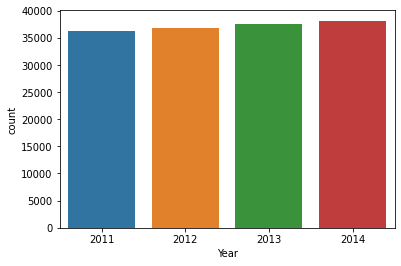

In [44]:
sns.countplot(x = "Year", data=sal)

**Implement seaborn's distplot for BasePay of Year 2011**

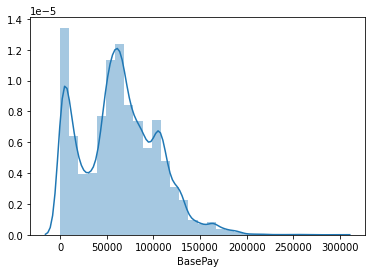

In [45]:
sns.distplot(sal[sal["Year"] == 2011]["BasePay"], bins = 30);

**How about other Year**

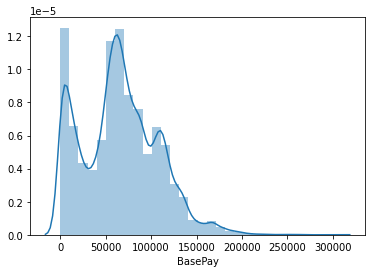

In [46]:
# Your Code Here for 2012
sns.distplot(sal[sal["Year"] == 2012]["BasePay"], bins = 30);

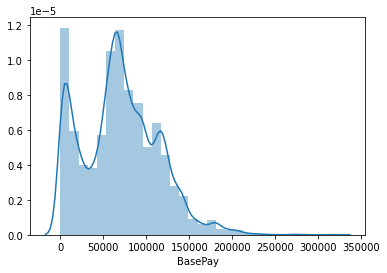

In [47]:
# Your Code Here for 2013
sns.distplot(sal[sal["Year"] == 2013]["BasePay"], bins = 30);

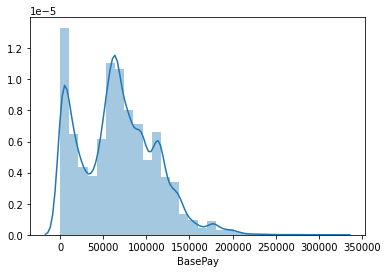

In [48]:
# Your Code Here for 2014
sns.distplot(sal[sal["Year"] == 2014]["BasePay"], bins = 30);

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

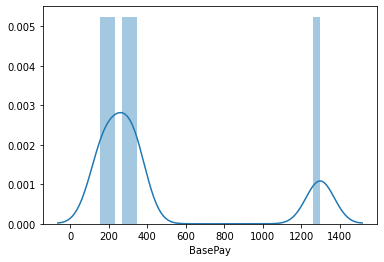

In [61]:
# Your Code Here
# sns.distplot(sal[sal["Year"] == 2014]["BasePay"], bins = 30);

top5BasePay = sal['BasePay'].value_counts(sort=True).nlargest(5)
sns.distplot(top5BasePay, bins = 30);



In [ ]:
# Your Code Here

**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

In [ ]:
# Your Code Here

# Great Job!